<a href="https://colab.research.google.com/github/devinandana01/DeviProject/blob/main/Devi_v17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
!pip install imbalanced-learn

## IMPORTING LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from numpy import argmax
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from collections import Counter

## IMPORTING DATASET

In [6]:
df=pd.read_csv("transactions_df.csv")
df

,TRANSACTION_ID,TX_DATETIME,ACCOUNT_ID,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,206,2023-04-01 02:03:24,1317,2,109726.21,7404,0,0,0,32384.484105,70990.724352,38735.485648,64768.968210,3278.0,3278.0,1,1,0,1.0,109726.21
1,210,2023-04-01 02:04:08,3131,3,47654.69,7448,0,0,0,14959.301807,32777.196782,14877.493218,29918.603613,1301.0,1301.0,1,1,0,1.0,47654.69
2,248,2023-04-01 02:19:19,746,2,48435.54,8359,0,0,0,19392.377010,40481.627412,7953.912588,38784.754021,6741.0,6741.0,1,1,0,1.0,48435.54
3,253,2023-04-01 02:21:08,3166,3,154065.84,8468,0,1,3,34707.819695,77200.845531,76864.994469,69415.639390,3516.0,3516.0,1,1,0,1.0,154065.84
4,269,2023-04-01 02:26:53,1432,2,53070.56,8813,0,0,0,18953.101452,41070.573515,11999.986485,37906.202903,1378.0,1378.0,1,1,0,1.0,53070.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755279,1760271,2023-09-30 23:58:19,4410,2,30797.10,15811099,182,0,0,24051.767660,50687.985324,-19890.885324,48103.535321,379700.0,379700.0,1,0,0,1.0,30797.10
1755280,1760272,2023-09-30 23:58:19,3681,2,23038.62,15811099,182,0,0,7136.890898,15888.629716,7149.990284,14273.781796,40692.0,40692.0,1,0,0,1.0,23038.62
1755281,1760273,2023-09-30 23:58:25,4657,1,68670.52,15811105,182,0,0,37607.193608,84875.116104,-16204.596104,75214.387216,34529.0,34529.0,1,0,0,1.0,68670.52
1755282,1760274,2023-09-30 23:58:34,4314,3,48549.57,15811114,182,0,0,35291.315650,75321.073282,-26771.503282,70582.631301,29642.0,29642.0,1,0,0,1.0,48549.57


## PRINTING COLUMNS

In [7]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'ACCOUNT_ID', 'TRANSACTION_TYPE',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO', 'TX_AMOUNT_STD', 'TX_AMOUNT_MEAN',
       'Amount_Deviation', 'Amount_Threshold', 'Time_Seconds_Diff',
       'Time_Diff', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT',
       'TX_FRAUD_1H_SCENARIO', 'ACCOUNT_ID_NB_TX_1H_WINDOW',
       'ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW'],
      dtype='object')

## VISUALISING LABEL COUNT

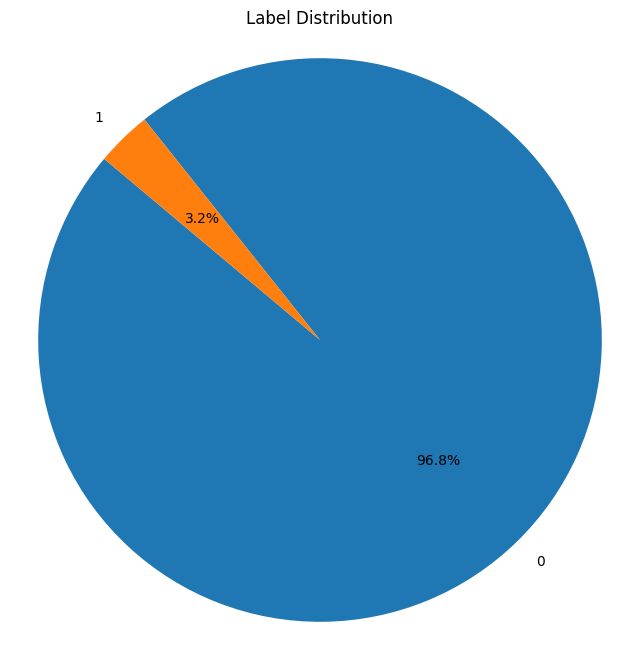

In [8]:
# Count the occurrences of each label
label_counts = df['TX_FRAUD'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## CORRELATION MAPPING

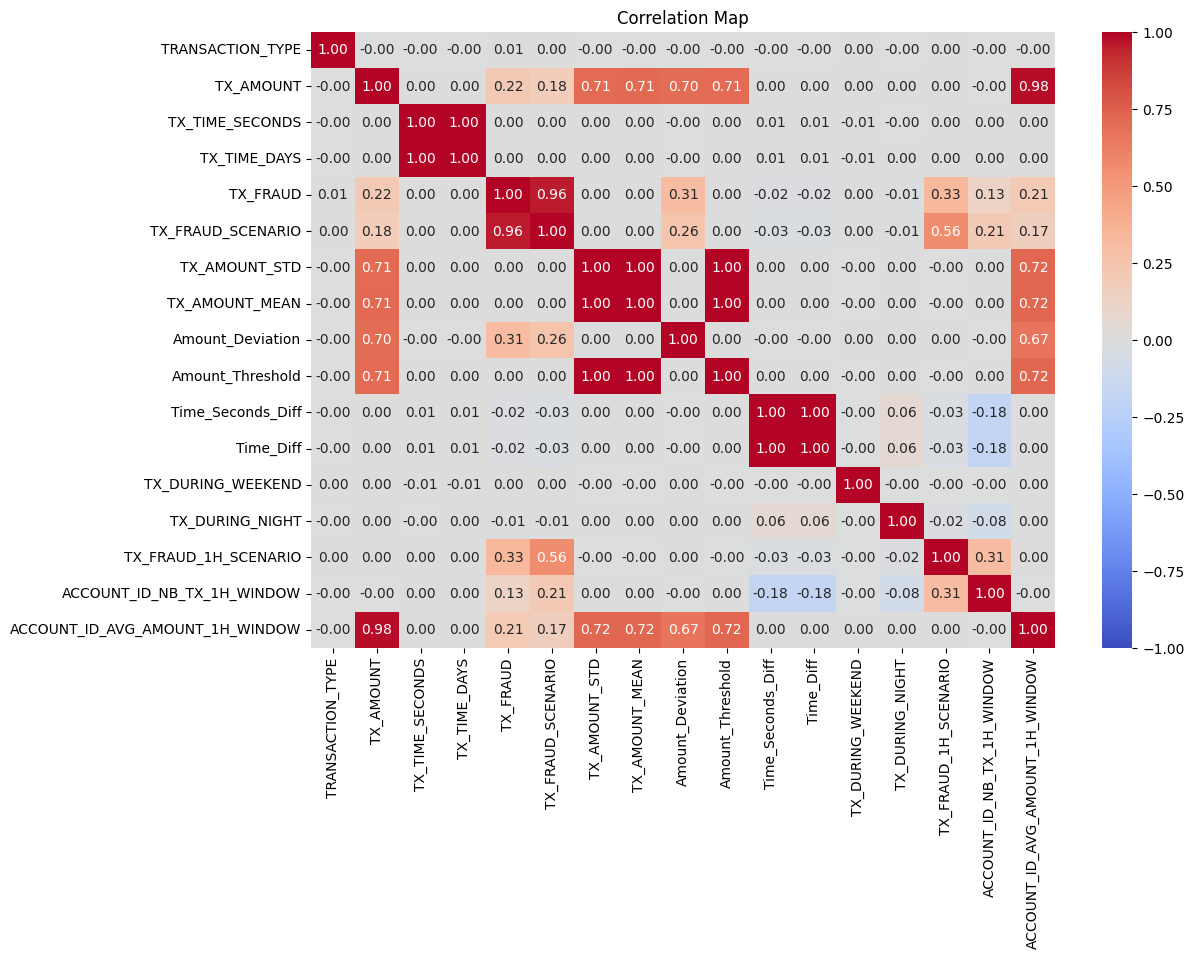

Highly Correlated Feature Pairs (above threshold):
TX_AMOUNT - ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW: 0.9835820010277098
TX_TIME_SECONDS - TX_TIME_DAYS: 0.9999920174637846
TX_TIME_DAYS - TX_TIME_SECONDS: 0.9999920174637846
TX_FRAUD - TX_FRAUD_SCENARIO: 0.955711651953663
TX_FRAUD_SCENARIO - TX_FRAUD: 0.955711651953663
TX_AMOUNT_STD - TX_AMOUNT_MEAN: 0.9962847166209892
TX_AMOUNT_STD - Amount_Threshold: 1.0
TX_AMOUNT_MEAN - TX_AMOUNT_STD: 0.9962847166209892
TX_AMOUNT_MEAN - Amount_Threshold: 0.9962847166209892
Amount_Threshold - TX_AMOUNT_STD: 1.0
Amount_Threshold - TX_AMOUNT_MEAN: 0.9962847166209892
Time_Seconds_Diff - Time_Diff: 1.0
Time_Diff - Time_Seconds_Diff: 1.0
ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW - TX_AMOUNT: 0.9835820010277098
Removed features: {'TX_TIME_SECONDS', 'TX_AMOUNT'}


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df1=df.drop(columns=['TRANSACTION_ID','TX_DATETIME', 'ACCOUNT_ID'])
# df = pd.read_csv('your_dataset.csv')

# Step 2: Generate a correlation matrix
correlation_matrix = df1.corr()

# Step 3: Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Map")
plt.show()

# Step 4: Identify highly correlated features
# Consider a threshold for high correlation (e.g., 0.8)
threshold = 0.8
high_correlation_pairs = [(i, j, correlation_matrix.loc[i, j])
                          for i in correlation_matrix.columns
                          for j in correlation_matrix.columns
                          if i != j and abs(correlation_matrix.loc[i, j]) > threshold]

print("Highly Correlated Feature Pairs (above threshold):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

# Step 5: Remove two highly correlated features
# Manually decide which features to drop or automate the process
# Example: Dropping the first two features with high correlation
features_to_drop = set(pair[0] for pair in high_correlation_pairs[:2])
# df_reduced = df1.drop(columns=features_to_drop)

print(f"Removed features: {features_to_drop}")


## EDA

In [10]:
# 1. Display the first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,TRANSACTION_ID,TX_DATETIME,ACCOUNT_ID,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,206,2023-04-01 02:03:24,1317,2,109726.21,7404,0,0,0,32384.484105,70990.724352,38735.485648,64768.968210,3278.0,3278.0,1,1,0,1.0,109726.21
1,210,2023-04-01 02:04:08,3131,3,47654.69,7448,0,0,0,14959.301807,32777.196782,14877.493218,29918.603613,1301.0,1301.0,1,1,0,1.0,47654.69
2,248,2023-04-01 02:19:19,746,2,48435.54,8359,0,0,0,19392.377010,40481.627412,7953.912588,38784.754021,6741.0,6741.0,1,1,0,1.0,48435.54
3,253,2023-04-01 02:21:08,3166,3,154065.84,8468,0,1,3,34707.819695,77200.845531,76864.994469,69415.639390,3516.0,3516.0,1,1,0,1.0,154065.84
4,269,2023-04-01 02:26:53,1432,2,53070.56,8813,0,0,0,18953.101452,41070.573515,11999.986485,37906.202903,1378.0,1378.0,1,1,0,1.0,53070.56


In [11]:
# 2. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
TRANSACTION_ID                     0
TX_DATETIME                        0
ACCOUNT_ID                         0
TRANSACTION_TYPE                   0
TX_AMOUNT                          0
TX_TIME_SECONDS                    0
TX_TIME_DAYS                       0
TX_FRAUD                           0
TX_FRAUD_SCENARIO                  0
TX_AMOUNT_STD                      0
TX_AMOUNT_MEAN                     0
Amount_Deviation                   0
Amount_Threshold                   0
Time_Seconds_Diff                  0
Time_Diff                          0
TX_DURING_WEEKEND                  0
TX_DURING_NIGHT                    0
TX_FRAUD_1H_SCENARIO               0
ACCOUNT_ID_NB_TX_1H_WINDOW         0
ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW    0
dtype: int64


In [12]:
# 3. Basic statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())


Statistical summary of numerical columns:
       TRANSACTION_ID    ACCOUNT_ID  TRANSACTION_TYPE     TX_AMOUNT  \
count    1.755284e+06  1.755284e+06      1.755284e+06  1.755284e+06   
mean     8.825946e+05  2.499581e+03      2.000665e+00  5.340778e+04   
std      5.067634e+05  1.448275e+03      8.176483e-01  3.961616e+04   
min      2.060000e+02  0.000000e+00      1.000000e+00  6.400000e-01   
25%      4.437798e+05  1.235000e+03      1.000000e+00  2.144230e+04   
50%      8.826295e+05  2.497000e+03      2.000000e+00  4.478921e+04   
75%      1.321454e+06  3.755000e+03      3.000000e+00  7.705512e+04   
max      1.760275e+06  4.999000e+03      4.000000e+00  3.077322e+05   

       TX_TIME_SECONDS  TX_TIME_DAYS      TX_FRAUD  TX_FRAUD_SCENARIO  \
count     1.755284e+06  1.755284e+06  1.755284e+06       1.755284e+06   
mean      7.926386e+06  9.124064e+01  3.184271e-02       1.101115e-01   
std       4.551363e+06  5.267772e+01  1.755812e-01       6.352929e-01   
min       7.404000e+03  0

In [13]:
# 4. Distribution of transaction types
print("\nTransaction type counts:")
print(df['TRANSACTION_TYPE'].value_counts())


Transaction type counts:
TRANSACTION_TYPE
1    585165
2    584785
3    584336
4       998
Name: count, dtype: int64


In [14]:
# 5. Distribution of fraud vs. non-fraud transactions
print("\nFraud vs. Non-fraud transactions:")
print(df['TX_FRAUD'].value_counts())


Fraud vs. Non-fraud transactions:
TX_FRAUD
0    1699391
1      55893
Name: count, dtype: int64


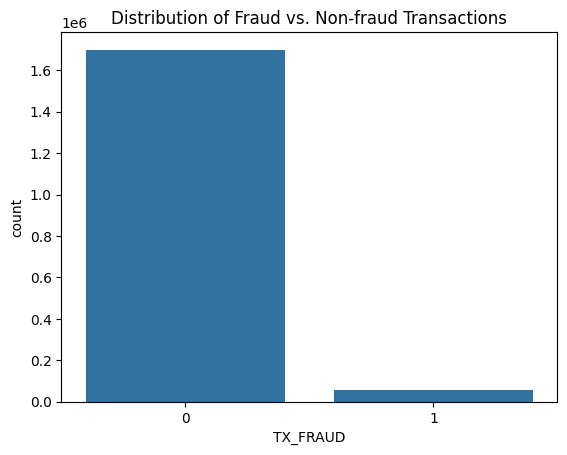

In [15]:
# 6. Visualizing fraud and non-fraud transactions
sns.countplot(data=df, x='TX_FRAUD')
plt.title("Distribution of Fraud vs. Non-fraud Transactions")
plt.show()

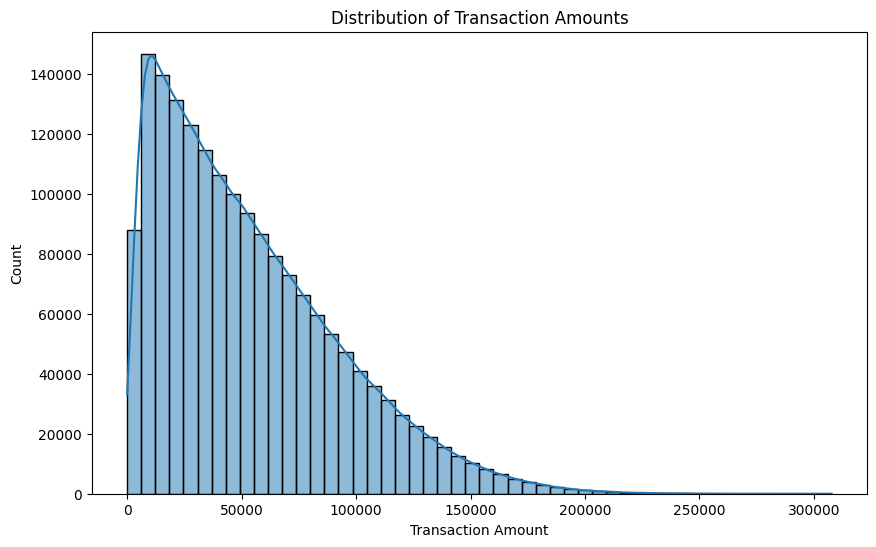

In [16]:
# 7. Transaction amount distribution (Overall)
plt.figure(figsize=(10, 6))
sns.histplot(df['TX_AMOUNT'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()

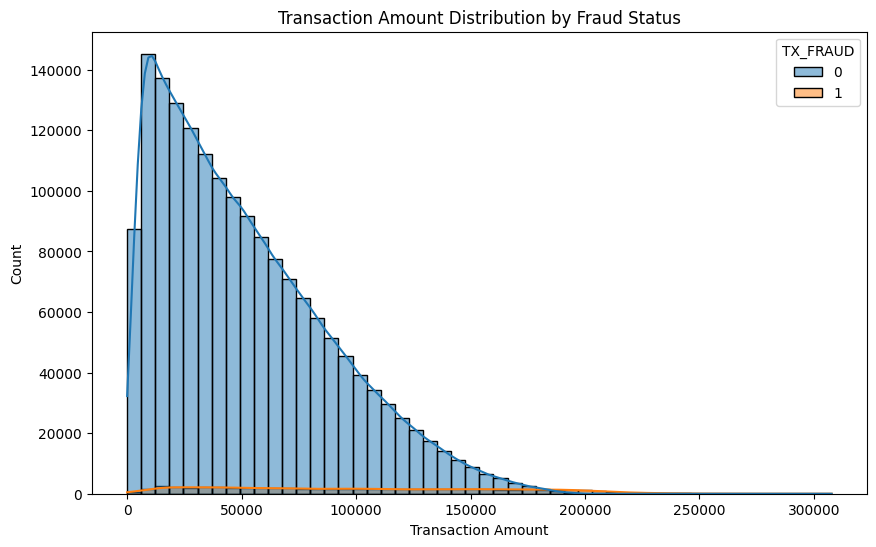

In [17]:
# 8. Transaction amount distribution by fraud status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TX_AMOUNT', hue='TX_FRAUD', bins=50, kde=True)
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Transaction Amount")
plt.show()

In [18]:
# 9. Mean transaction amount per fraud status
mean_amount_by_fraud = df.groupby('TX_FRAUD')['TX_AMOUNT'].mean()
print("\nMean transaction amount by fraud status:")
print(mean_amount_by_fraud)


Mean transaction amount by fraud status:
TX_FRAUD
0     51848.295763
1    100822.762183
Name: TX_AMOUNT, dtype: float64


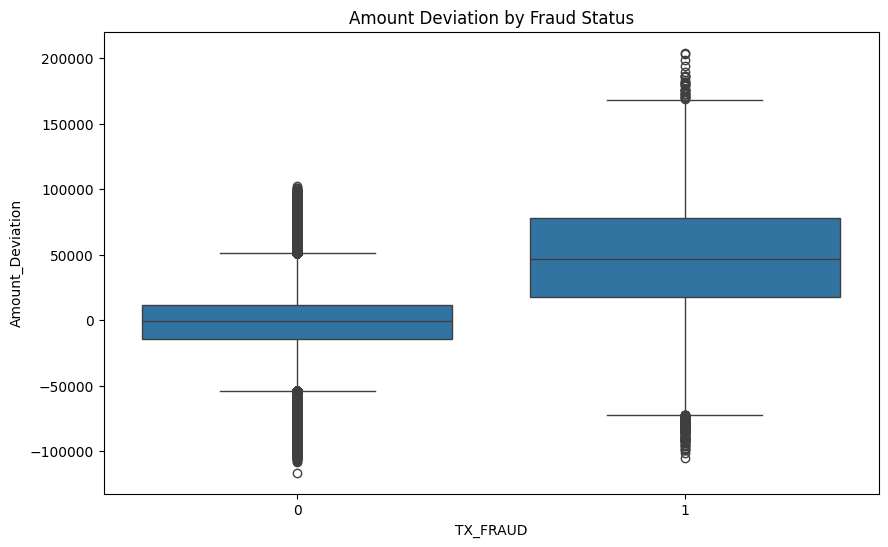

In [19]:
# 10. Analysis of Amount Deviation by Fraud Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TX_FRAUD', y='Amount_Deviation')
plt.title("Amount Deviation by Fraud Status")
plt.show()

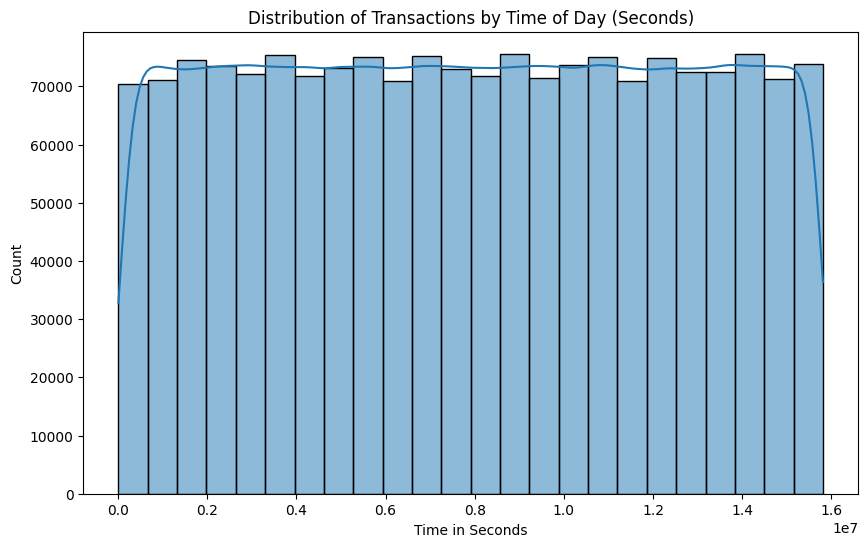

In [20]:
# 11. Transaction count by time of day
plt.figure(figsize=(10, 6))
sns.histplot(df['TX_TIME_SECONDS'], bins=24, kde=True)
plt.title("Distribution of Transactions by Time of Day (Seconds)")
plt.xlabel("Time in Seconds")
plt.show()

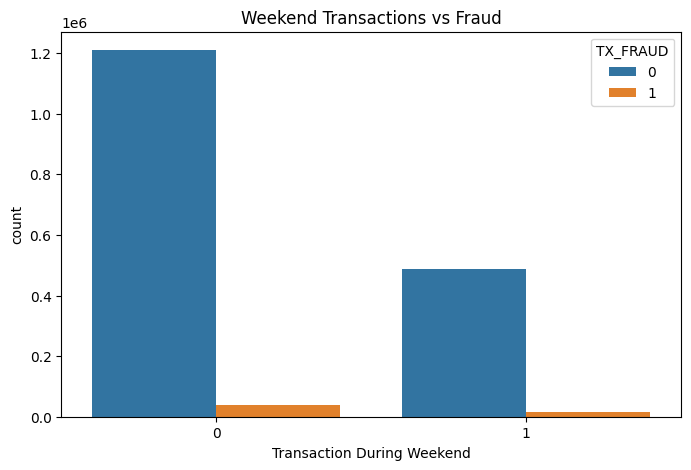

In [21]:
# 12. Transactions on weekends vs. fraud rate
df['TX_DURING_NIGHT'] = df['TX_DURING_NIGHT'].astype(str)
df['TX_FRAUD'] = df['TX_FRAUD'].astype(str)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TX_DURING_WEEKEND', hue='TX_FRAUD')
plt.title("Weekend Transactions vs Fraud")
plt.xlabel("Transaction During Weekend")
plt.show()

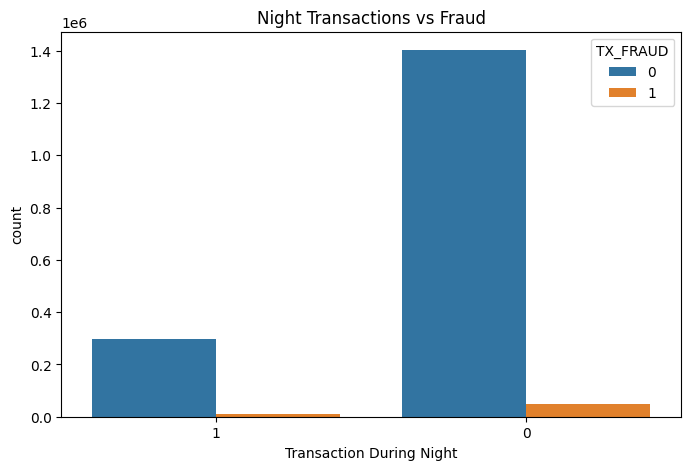

In [22]:
# 13. Transactions at night vs fraud rate
# Convert 'TX_DURING_NIGHT' and 'TX_FRAUD' to strings to ensure proper interpretation
df['TX_DURING_NIGHT'] = df['TX_DURING_NIGHT'].astype(str)
df['TX_FRAUD'] = df['TX_FRAUD'].astype(str)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TX_DURING_NIGHT', hue='TX_FRAUD')
plt.title("Night Transactions vs Fraud")
plt.xlabel("Transaction During Night")
plt.show()

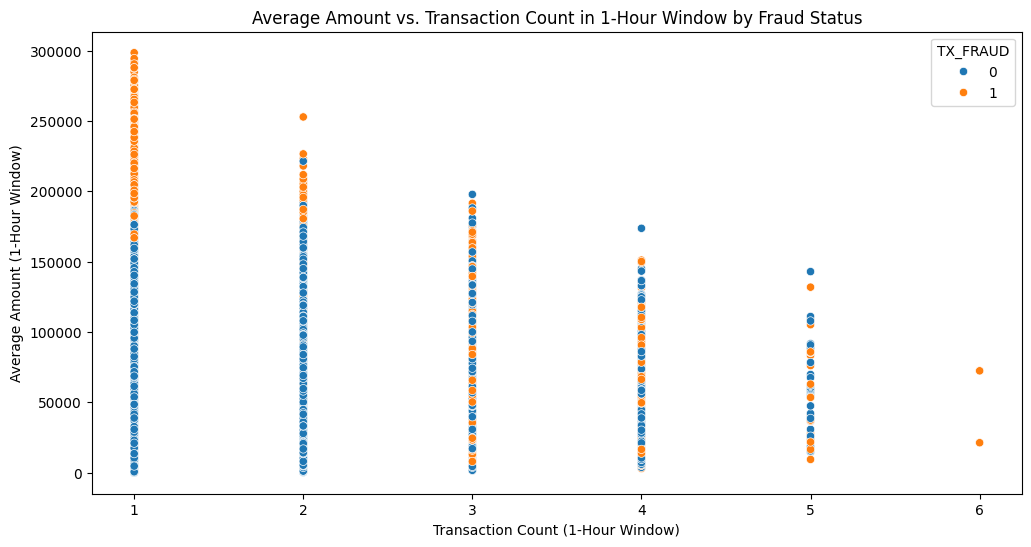

In [23]:
# 14. Average amount and transaction count within 1-hour window
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='ACCOUNT_ID_NB_TX_1H_WINDOW', y='ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW', hue='TX_FRAUD')
plt.title("Average Amount vs. Transaction Count in 1-Hour Window by Fraud Status")
plt.xlabel("Transaction Count (1-Hour Window)")
plt.ylabel("Average Amount (1-Hour Window)")
plt.show()

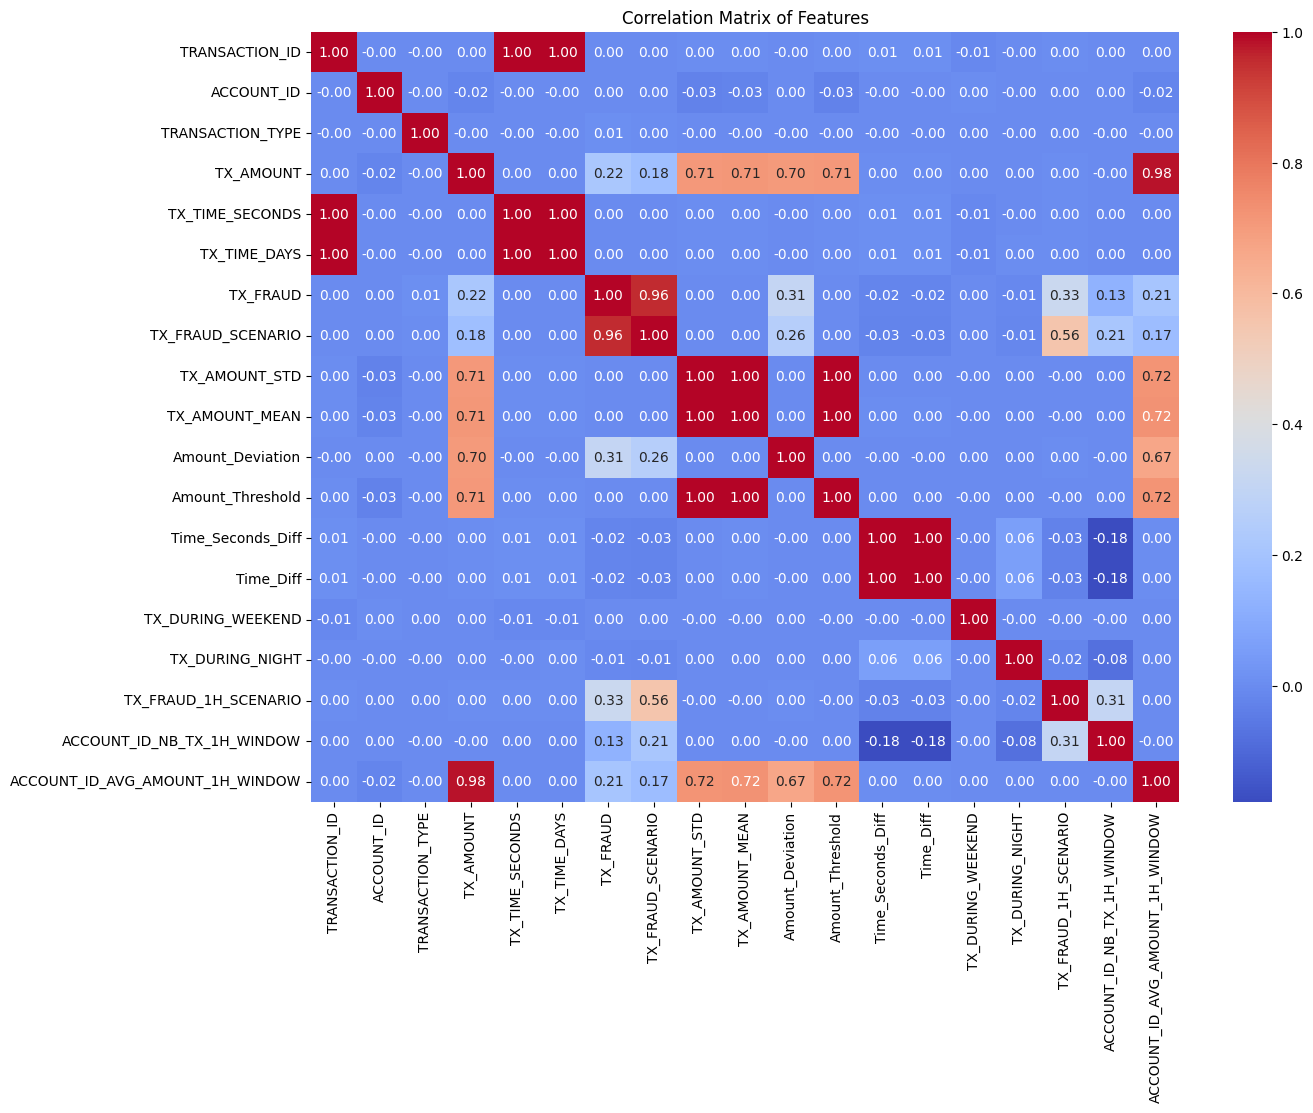

In [24]:
# 15. Correlation matrix heatmap
x1=df.drop(columns=['TX_DATETIME'])
plt.figure(figsize=(14, 10))
sns.heatmap(x1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

## ASSIGNING VALUES FOR DATA AND TARGET

In [25]:
x=df.drop(columns=['TRANSACTION_ID','TX_DATETIME', 'ACCOUNT_ID','TX_FRAUD','TX_FRAUD_SCENARIO'])
y=df['TX_FRAUD']

In [26]:
x

,TRANSACTION_TYPE,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_AMOUNT_STD,TX_AMOUNT_MEAN,Amount_Deviation,Amount_Threshold,Time_Seconds_Diff,Time_Diff,TX_DURING_WEEKEND,TX_DURING_NIGHT,TX_FRAUD_1H_SCENARIO,ACCOUNT_ID_NB_TX_1H_WINDOW,ACCOUNT_ID_AVG_AMOUNT_1H_WINDOW
0,2,109726.21,7404,0,32384.484105,70990.724352,38735.485648,64768.968210,3278.0,3278.0,1,1,0,1.0,109726.21
1,3,47654.69,7448,0,14959.301807,32777.196782,14877.493218,29918.603613,1301.0,1301.0,1,1,0,1.0,47654.69
2,2,48435.54,8359,0,19392.377010,40481.627412,7953.912588,38784.754021,6741.0,6741.0,1,1,0,1.0,48435.54
3,3,154065.84,8468,0,34707.819695,77200.845531,76864.994469,69415.639390,3516.0,3516.0,1,1,0,1.0,154065.84
4,2,53070.56,8813,0,18953.101452,41070.573515,11999.986485,37906.202903,1378.0,1378.0,1,1,0,1.0,53070.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755279,2,30797.10,15811099,182,24051.767660,50687.985324,-19890.885324,48103.535321,379700.0,379700.0,1,0,0,1.0,30797.10
1755280,2,23038.62,15811099,182,7136.890898,15888.629716,7149.990284,14273.781796,40692.0,40692.0,1,0,0,1.0,23038.62
1755281,1,68670.52,15811105,182,37607.193608,84875.116104,-16204.596104,75214.387216,34529.0,34529.0,1,0,0,1.0,68670.52
1755282,3,48549.57,15811114,182,35291.315650,75321.073282,-26771.503282,70582.631301,29642.0,29642.0,1,0,0,1.0,48549.57


In [27]:
y

,TX_FRAUD
0,0
1,0
2,0
3,1
4,0
...,...
1755279,0
1755280,0
1755281,0
1755282,0


## FITTING AND TRAINING THE MODEL

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.2,stratify=y ,random_state=56 )

## USING SMOT

In [29]:
print("Before SMOTE:", Counter(y))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({'0': 1699391, '1': 55893})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


After SMOTE: Counter({'0': 1359513, '1': 1359513})


## ML MODELS

# KNN

In [30]:
KNN1=KNeighborsClassifier(n_neighbors=32, metric='minkowski', p=2 )
KNN1.fit(X_train_resampled, y_train_resampled)
y_predKNN=KNN1.predict(X_test)
y_actKNN=y_test
acc=accuracy_score(y_actKNN,y_predKNN)
cm=confusion_matrix(y_actKNN,y_predKNN)
print(cm)
print("accuracy:",acc)

[[305980  33898]
 [  1875   9304]]
accuracy: 0.8980991690808046


## CROSS VALIDATION

In [31]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(KNN1, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
# Output results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average accuracy: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

Cross-validation scores: [0.93880354 0.93933303 0.93953531 0.93883469 0.93905904]
Average accuracy: 0.9391131237103212
Standard deviation: 0.0002838631179270118


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the parameter grid for tuning
param_grid = {
    'n_neighbors': [5, 10, 20, 30, 40, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create the KNeighborsClassifier model
KNN = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')

# Fit the model on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model after tuning
best_KNN = grid_search.best_estimator_

# Evaluate the model on the test set
y_predKNN = best_KNN.predict(X_test)
y_actKNN = y_test

# Compute confusion matrix and accuracy score
cm = confusion_matrix(y_actKNN, y_predKNN)
accuracy = accuracy_score(y_actKNN, y_predKNN)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

## AUC ROC CURVE

In [36]:
y_pred_proba = KNN1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

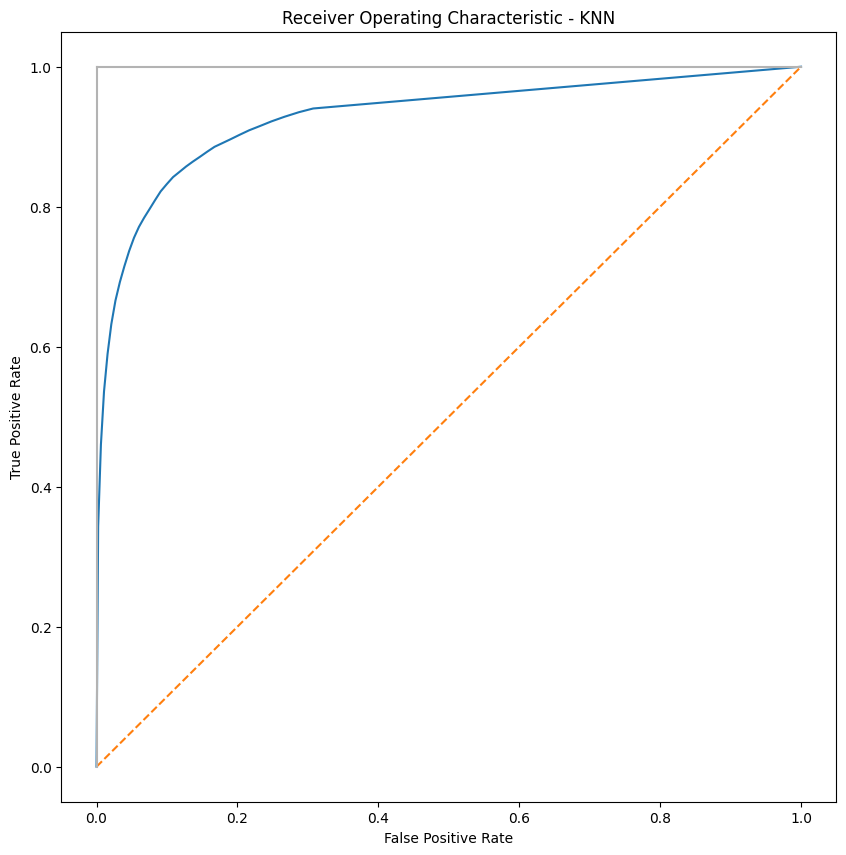

In [37]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(fpr, tpr,label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## LOGISTIC REGRESSION

In [32]:
LR= LogisticRegression(
    penalty='l2',           # Regularization type
    C=1.0,                 # Inverse of regularization strength
    solver='lbfgs',        # Optimization algorithm
    max_iter=100,          # Maximum number of iterations
    class_weight='balanced',  # Handles class imbalance
    random_state=42        # For reproducibility
)
LR.fit(X_train_resampled, y_train_resampled)
y_predLR=LR.predict(X_test)
y_actLR=y_test
print(confusion_matrix(y_actLR,y_predLR))
print("accuracy_score:",accuracy_score(y_actLR,y_predLR))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[290724  49154]
 [  2057   9122]]
accuracy_score: 0.8541234044613838


## CROSS VALIDATION

In [38]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(LR, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
# Output results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average accuracy: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.83882671 0.84182014 0.84134938 0.84060279 0.8413457 ]
Average accuracy: 0.8407889449980365
Standard deviation: 0.0010556922549779604


## AUC ROC CURVE

In [39]:
y_pred_proba = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

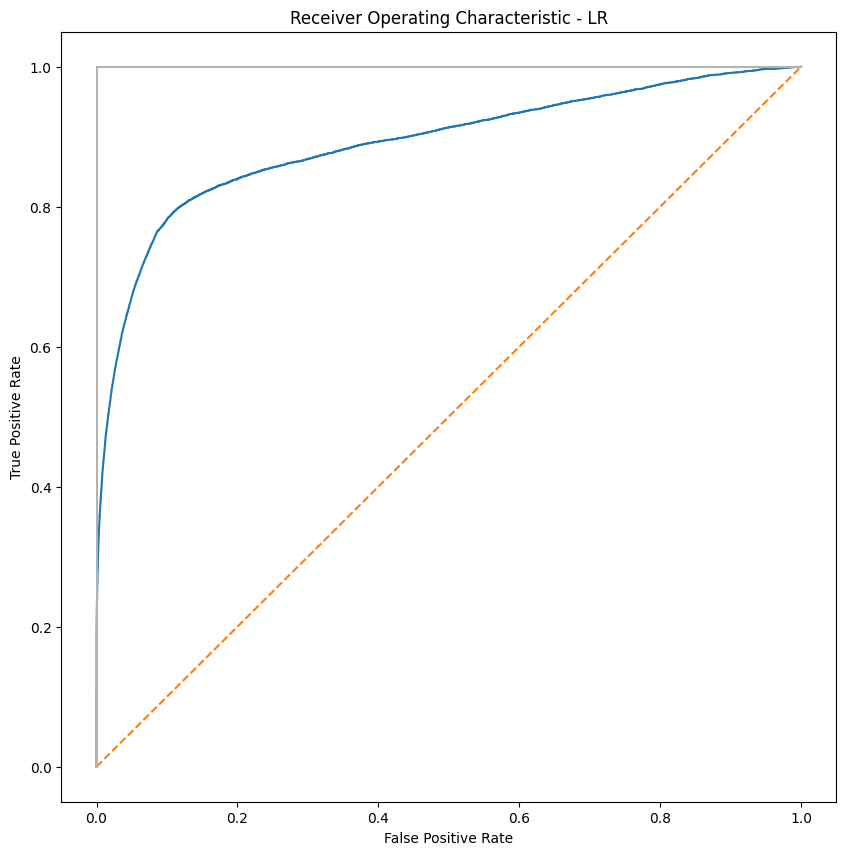

In [40]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LR')
plt.plot(fpr, tpr,label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## VOTING CLASSIFIER

In [ ]:
estimators = [  ('rf', LogisticRegression()),
              ('dt',GaussianNB() )]
vot_hard = VotingClassifier(estimators = estimators, voting ='soft')
vot_hard.fit(X_train_resampled, y_train_resampled)
y_pred_VOT=vot_hard.predict(X_test)
y_act_VOT=y_test
acc=accuracy_score(y_act_VOT,y_pred_VOT)
print(confusion_matrix(y_act_VOT,y_pred_VOT))
print("accuracy:",acc)

## ROC CURVE

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

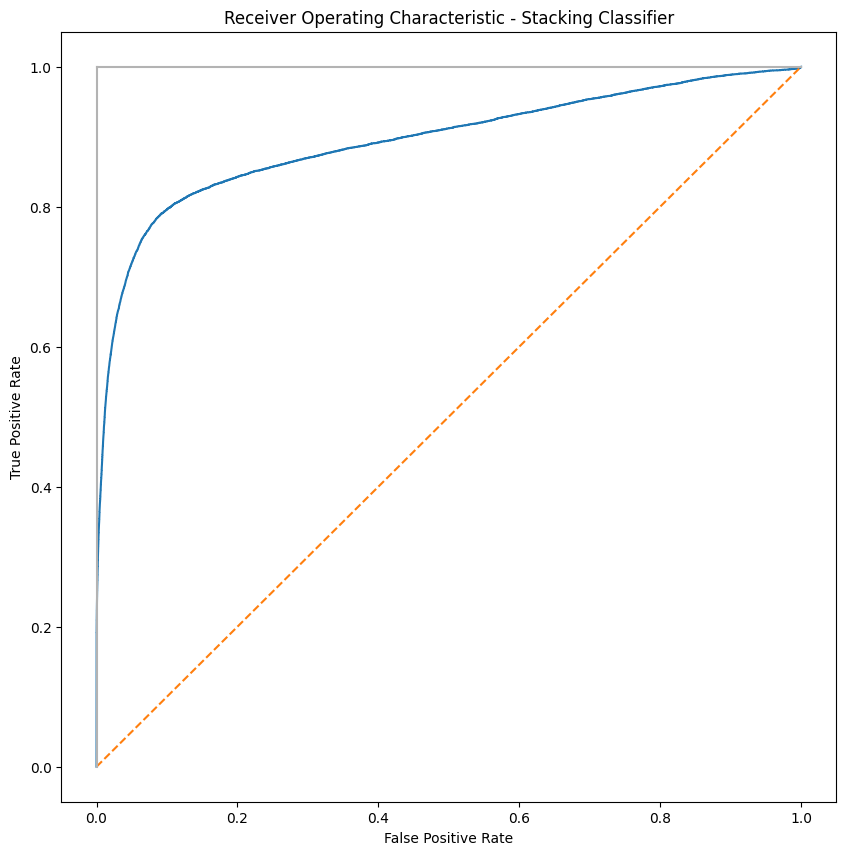

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Stacking Classifier')
plt.plot(fpr, tpr,label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## XG BOOST

In [41]:
# Initialize the XGBoost model for classification
X_BoostModel = xgb.XGBClassifier(
    n_estimators=100,        # Number of trees
    max_depth=6,             # Maximum depth of a tree
    learning_rate=0.1,       # Step size shrinkage
    subsample=0.8,           # Subsample ratio of the training data
    colsample_bytree=0.8,    # Subsample ratio of columns
    random_state=42          # Random seed
)
y_train_resampled = y_train_resampled.astype(int)
y_test = y_test.astype(int)
X_test = X_test.astype(int)
X_train_resampled=X_train_resampled.astype(int)

# Fit the model
X_BoostModel.fit(X_train_resampled, y_train_resampled)
# Predict on test data
y_act=y_test
y_pred = X_BoostModel.predict(X_test)
acc=accuracy_score(y_act,y_pred)
cm=confusion_matrix(y_act,y_pred)
print(cm)
print("accuracy:",acc)


[[328357  11521]
 [     8  11171]]
accuracy: 0.9671591792785786


## CROSS VALIDATION

## FOR VISUALIZING CM

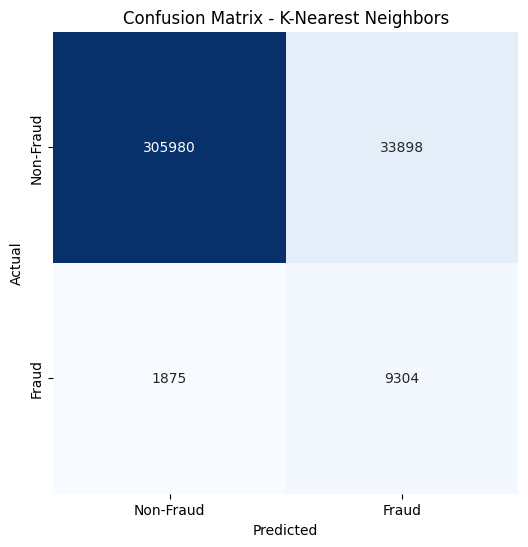

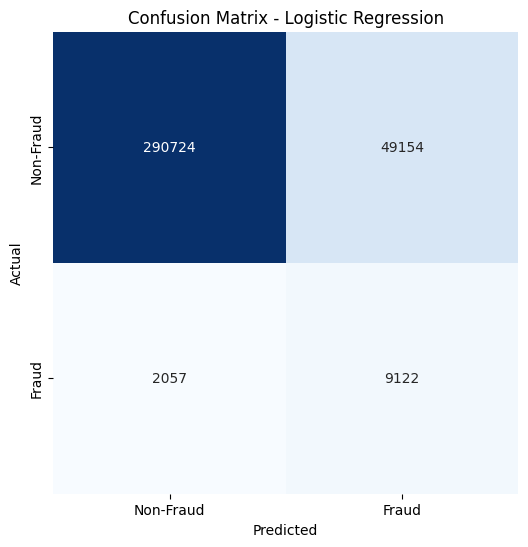

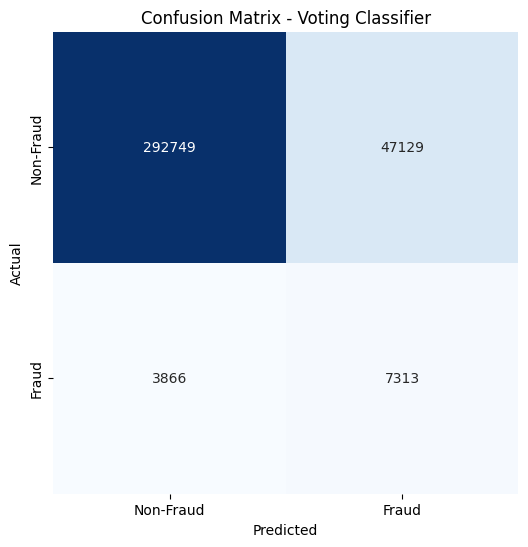

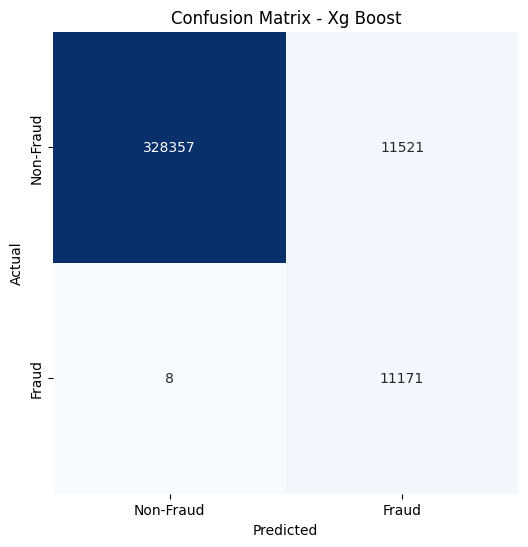

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion matrices for each model (These would be derived from your earlier outputs)
cm_knn = np.array([[305980, 33898], [1875, 9304]])  # K-Nearest Neighbors
cm_lr = np.array([[290724, 49154], [2057, 9122]])  # Logistic Regression
cm_voting = np.array([[292749, 47129], [3866, 7313]])  # Voting Classifier
cm_xg = np.array([[328357, 11521],[8, 11171]])

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for each model
plot_confusion_matrix(cm_knn, "K-Nearest Neighbors")
plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_voting, "Voting Classifier")
plot_confusion_matrix(cm_xg, "Xg Boost")